In [2]:
%run load_names.ipynb
%run features.ipynb

In [3]:
from matplotlib import pyplot as plt

In [4]:
names = load_firstnames()
males = count_male(names)
females = count_female(names)

In [5]:
class Node:
    def __init__(self, names, name):
        self.left = None
        self.right = None
        self.names = names
        self.name = name
        self.total_number_names = len(names)
        self.ratio_left = None
        self.ratio_right = None
        self.number_filtered_left = None
        self.number_filtered_right = None
        
    def calculate_ratio(self):
        if self.total_number_names > 0:
            self.ratio_left = (self.number_filtered_left * 100) / self.total_number_names
            self.ratio_right = (self.number_filtered_right * 100) / self.total_number_names

In [6]:
def draw_bar_for_feature(feature_rule, names, title, show_plt=False):
    xaxis = []

    for name in names:
        count = feature_rule(name[0])
        if count not in xaxis:
            xaxis.append(count)

    xaxis.sort()
    male = [0] * len(xaxis)
    female = [0] * len(xaxis)

    for name in names:
        count = feature_rule(name[0])
        index = xaxis.index(count)
        if is_female(name[1]):
            female[index] = female[index] + 1
        else:
            male[index] = male[index] + 1
    
    percentage_m = 0
    for i in range(len(xaxis)):
        percentage_m = (male[i] * 100) / males
    #    print("occurence: {} percentage: {}".format(xaxis[i], percentage_m))
    
    if show_plt:
        plt.bar(xaxis, male, align='center')
        limit = max(max(female), max(male)) + 200
        plt.ylim(0, limit)
        plt.title(title + ' for male names')
        plt.show()
        plt.bar(xaxis, female, align='center')
        plt.ylim(0, limit)
        plt.title(title + ' for female names')
        plt.show()
    
    percentage_f = 0
    for i in range(len(xaxis)):
        percentage_f = (female[i] * 100) / females
    #    print("occurence: {} percentage: {}".format(xaxis[i], percentage_f))
        
    try:
        align = (percentage_m + percentage_f) / 100
        m_align = percentage_m / align
        f_align = percentage_f / align
    except ZeroDivisionError:
        m_align = 0
        f_align = 0
        
    return m_align, f_align

In [7]:
def create_node(parent_node, feature, text):
    names = parent_node.names
    filter_left = [name for name in names if feature(name[0]) == 1]
    filter_right = [name for name in names if feature(name[0]) == 0]
    node_left = Node(filter_left, "True {}".format(text))
    node_right = Node(filter_right, "False {}".format(text))
    parent_node.left = node_left
    parent_node.right = node_right
    parent_node.number_filtered_left = len(filter_left)
    parent_node.number_filtered_right = len(filter_right)
    parent_node.calculate_ratio()

    print("all size: {}".format(len(parent_node.names)))
    print("ratio left: {}".format(parent_node.ratio_left))
    print("ratio right: {}".format(parent_node.ratio_right))
    print("size True: {}".format(parent_node.number_filtered_left))
    print("size False: {}".format(parent_node.number_filtered_right))
    return parent_node, node_left, node_right

In [8]:
#Root Last Letter_A
root_node, l1t, l1f = create_node(Node(names, "LAYER 1"), count_vowel_gt_2, "vowel count > 2")

all size: 18370
ratio left: 53.630919978225364
ratio right: 46.369080021774636
size True: 9852
size False: 8518


In [9]:
l1t, l1t_l2t, l1t_l2f = create_node(l1t, last_letter_vowel, "last letter vowel")
print("################################")
l1f, l1f_l2t, l1f_l2f = create_node(l1f, last_letter_vowel, "last letter vowel")

all size: 9852
ratio left: 74.24888347543646
ratio right: 25.75111652456354
size True: 7315
size False: 2537
################################
all size: 8518
ratio left: 35.548250763089925
ratio right: 64.45174923691008
size True: 3028
size False: 5490


In [10]:
l1t_l2t, l1t_l2t_l3t, l1t_l2t_l3f = create_node(l1t_l2t, last_letter_a, "last letter a")
print("################################")
l1t_l2f, l1t_l2f_l3t, l1t_l2f_l3f = create_node(l1t_l2f, last_letter_a, "last letter a")
print("################################")
l1f_l2t, l1f_l2t_l3t, l1f_l2t_l3f = create_node(l1f_l2t, last_letter_a, "last letter a")
print("################################")
l1f_l2f, l1f_l2f_l3t, l1f_l2f_l3f = create_node(l1f_l2f, last_letter_a, "last letter a")

all size: 7315
ratio left: 57.170198222829804
ratio right: 42.829801777170196
size True: 4182
size False: 3133
################################
all size: 2537
ratio left: 0.0
ratio right: 100.0
size True: 0
size False: 2537
################################
all size: 3028
ratio left: 51.38705416116248
ratio right: 48.61294583883752
size True: 1556
size False: 1472
################################
all size: 5490
ratio left: 0.0
ratio right: 100.0
size True: 0
size False: 5490


In [11]:
l1t_l2t_l3t, l1t_l2t_l3t_l4t, l1t_l2t_l3t_l4f = create_node(l1t_l2t_l3t, first_letter_vowel, "first letter vowel")
print("################################")
l1t_l2t_l3f, l1t_l2t_l3f_l4t, l1t_l2t_l3f_l4f = create_node(l1t_l2t_l3f, first_letter_vowel, "first letter vowel")
print("################################")
l1t_l2f_l3t, l1t_l2f_l3t_l4t, l1t_l2f_l3t_l4f = create_node(l1t_l2f_l3t, first_letter_vowel, "first letter vowel")
print("################################")
l1t_l2f_l3f, l1f_l2f_l3f_l4t, l1f_l2f_l3f_l4f = create_node(l1t_l2f_l3f, first_letter_vowel, "first letter vowel")
print("################################")
l1f_l2t_l3t, l1f_l2t_l3t_l4t, l1f_l2t_l3t_l4f = create_node(l1f_l2t_l3t, first_letter_vowel, "first letter vowel")
print("################################")
l1f_l2t_l3f, l1f_l2t_l3f_l4t, l1f_l2t_l3f_l4f = create_node(l1f_l2t_l3f, first_letter_vowel, "first letter vowel")
print("################################")
l1f_l2f_l3t, l1f_l2f_l3t_l4t, l1f_l2f_l3t_l4f = create_node(l1f_l2f_l3t, first_letter_vowel, "first letter vowel")
print("################################")
l1f_l2f_l3f, l1f_l2f_l3f_l4t, l1f_l2f_l3f_l4f = create_node(l1f_l2f_l3f, first_letter_vowel, "first letter vowel")

all size: 4182
ratio left: 25.08369201339072
ratio right: 74.91630798660928
size True: 1049
size False: 3133
################################
all size: 3133
ratio left: 23.396105968720075
ratio right: 76.60389403127992
size True: 733
size False: 2400
################################
all size: 0
ratio left: None
ratio right: None
size True: 0
size False: 0
################################
all size: 2537
ratio left: 26.72447772960189
ratio right: 73.27552227039811
size True: 678
size False: 1859
################################
all size: 1556
ratio left: 10.539845758354756
ratio right: 89.46015424164524
size True: 164
size False: 1392
################################
all size: 1472
ratio left: 12.703804347826088
ratio right: 87.2961956521739
size True: 187
size False: 1285
################################
all size: 0
ratio left: None
ratio right: None
size True: 0
size False: 0
################################
all size: 5490
ratio left: 16.15664845173042
ratio right: 83.84335154826958
si

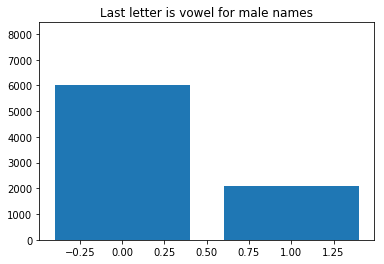

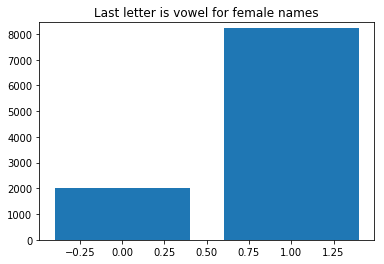

(24.29941747839217, 75.70058252160784)

In [12]:
draw_bar_for_feature(last_letter_vowel, names, "Last letter is vowel", show_plt=True)

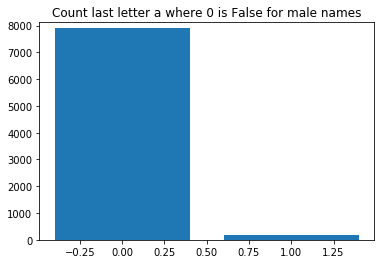

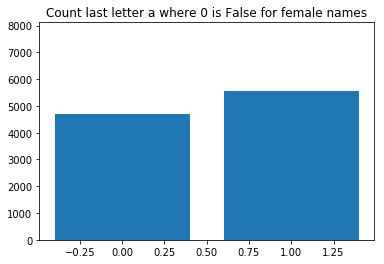

(3.9843105664414695, 96.01568943355852)

In [13]:
draw_bar_for_feature(last_letter_a, names, "Count last letter a where 0 is False", show_plt=True)

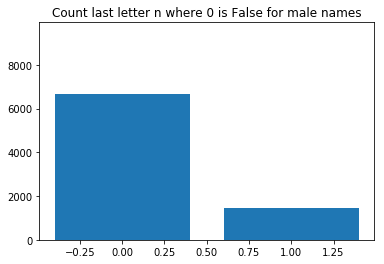

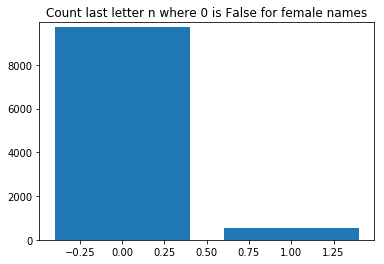

(77.80167214729946, 22.19832785270053)

In [14]:
draw_bar_for_feature(last_letter_n, names, "Count last letter n where 0 is False", show_plt=True)

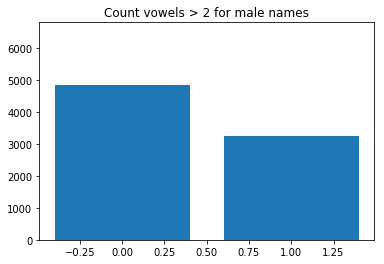

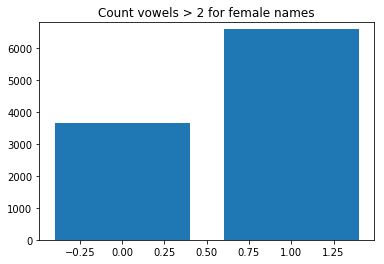

(38.40866902119039, 61.5913309788096)

In [15]:
draw_bar_for_feature(count_vowel_gt_2, names, "Count vowels > 2", show_plt=True)

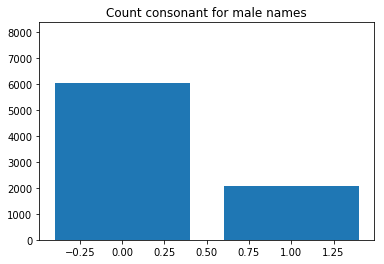

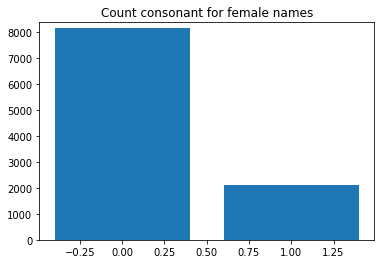

(55.660831842039656, 44.33916815796033)

In [16]:
draw_bar_for_feature(lambda name: count_consonant(name) > 4, names, "Count consonant", show_plt=True)

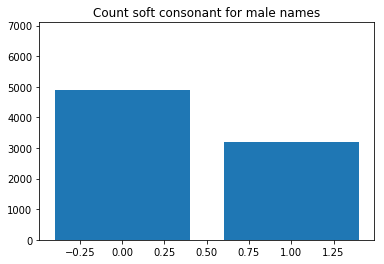

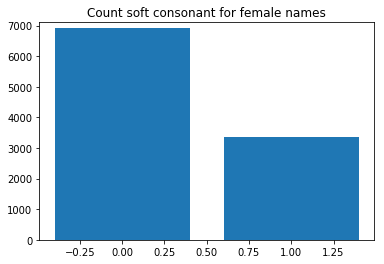

(54.748795436435294, 45.25120456356472)

In [17]:
draw_bar_for_feature(lambda name: count_soft_consonant(name) > 0, names, "Count soft consonant", show_plt=True)

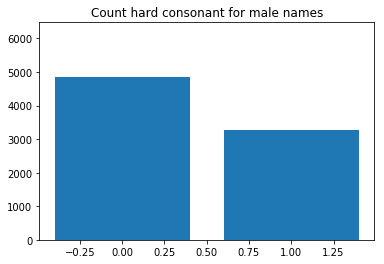

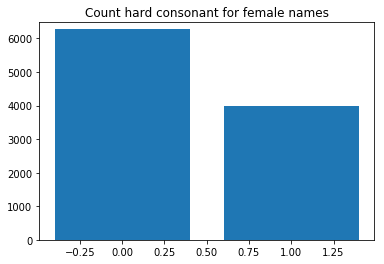

(50.885374214243086, 49.11462578575692)

In [18]:
draw_bar_for_feature(lambda name: count_hard_consonant(name) > 0, names, "Count hard consonant", show_plt=True)

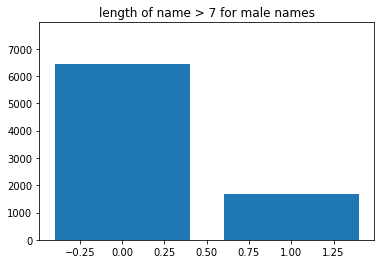

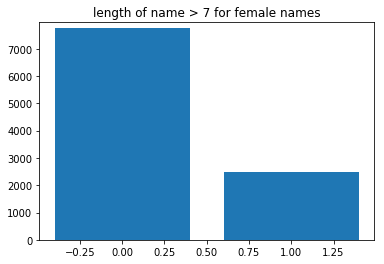

(46.003123123533236, 53.996876876466764)

In [19]:
draw_bar_for_feature(lambda name: len_name(name) > 7, names, "length of name > 7", show_plt=True)

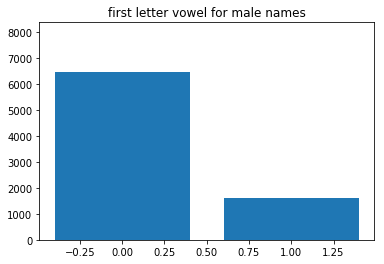

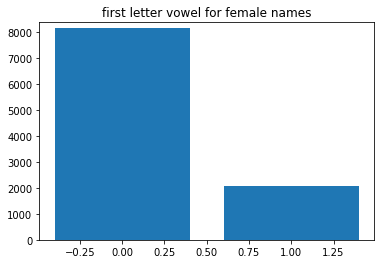

(49.769872426026325, 50.230127573973675)

In [20]:
draw_bar_for_feature(first_letter_vowel, names, "first letter vowel", show_plt=True)